In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import glob
import json
import torch
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.ticker as ticker
from matplotlib.backends.backend_pgf import FigureCanvasPgf
from matplotlib import pyplot as plt
%matplotlib inline

import tsvar
tsvar.plotting.set_aistat_matplotib_rcparams()

In [3]:
def build_Id(row):
    return os.path.join(os.path.split(row['expId'])[1], row['outputIdx'])

In [4]:
EXP_DIR = "../output/dataRegimes-n10-2-old/"
all_output_df = tsvar.plotting.load_outputs(exp_dir=EXP_DIR)
all_output_df['Id'] = all_output_df.apply(build_Id, axis=1)
def filter_func(col): 
    return ((not col.startswith('mle')) 
            and (not col.startswith('bbvi')))
cols = [col for col in all_output_df.columns if filter_func(col)]
all_output_df = all_output_df.loc[:, cols]

EXP_DIR_MLE = "../output/dataRegimes-n10-2-2ndRun-all/"
mle_output_df = tsvar.plotting.load_outputs(exp_dir=EXP_DIR_MLE)
mle_output_df['Id'] = mle_output_df.apply(build_Id, axis=1)
def filter_func(col):
    return (col.startswith('mle')
            or col.startswith('bbvi')
            or col in ['Id'])
mle_cols = [col for col in mle_output_df.columns if filter_func(col)]
mle_output_df = mle_output_df.loc[:, mle_cols]

output_df = pd.merge(all_output_df, mle_output_df, on='Id', how='outer',)

Process file: ../output/dataRegimes-n10-2-old/1590694516-g04-d10-n020000/output-03.json...
Process file: ../output/dataRegimes-n10-2-2ndRun-all/1590694516-g04-d10-n020000/output-03.json...


---

In [5]:
suf_col_dict = {
    'mle_other': 'mle_other_adjacency',
    
    #'bbvi': 'bbvi_adj_mean', 
    'bbvi': 'bbvi_adj_mode',
    
    #'vi': 'vi_adj_mean',
    'vi': 'vi_adj_mode',
    
    #'vi_fixed_beta_mean': 'vi_fixed_beta_adj_mean',
    #'vi_fixed_beta_mode': 'vi_fixed_beta_adj_mode',
    
    'gb': 'gb_adj_normed',
}

plot_df = tsvar.plotting.make_plot_df(output_df, suf_col_dict, agg_col='max_jumps', threshold=0.05)
plot_df

acc_mle_other                               acc_bbvi                \
                    min   max    mean       std count      min   max    mean   
max_jumps                                                                      
499                0.56  0.76  0.6485  0.056965    20     0.52  0.71  0.6135   
753                0.52  0.77  0.6805  0.066608    20     0.47  0.73  0.6120   
1134               0.60  0.88  0.7395  0.069772    20     0.63  0.82  0.7145   
1709               0.66  0.86  0.7855  0.049681    20     0.65  0.81  0.7115   
2576               0.69  0.90  0.7990  0.061293    20     0.57  0.86  0.7295   
3881               0.76  0.92  0.8485  0.040688    20     0.80  0.94  0.8775   
5848               0.77  0.92  0.8565  0.042087    20     0.79  0.97  0.9060   
8810               0.75  0.94  0.8550  0.056893    20     0.89  0.98  0.9305   
13274              0.83  0.94  0.8820  0.027834    20     0.88  1.00  0.9545   
20000              0.84  0.95  0.9040  0.030677    20     0.93  1.00  0.9685   

                           ... fn_vi                            fn_gb      \
                std count  ...   min max   mean       std count   min max   
max_jumps                  ...                                              
499        0.058784    20  ...    22  39  31.30  5.371465    20    23  37   
753        0.075853    20  ...    14  44  28.30  7.079251    20    21  40   
1134       0.051450    20  ...    11  25  19.25  3.226127    20    22  33   
1709       0.043198    20  ...    11  21  16.50  2.544344    20    23  37   
2576       0.077831    20  ...     5  25  14.55  5.510516    20    23  37   
3881       0.045523    20  ...     3  14   6.40  2.909151    20    11  28   
5848       0.053449    20  ...     1  11   4.70  3.180533    20    14  30   
8810       0.023278    20  ...     0   8   3.80  2.142306    20    14  25   
13274      0.027237    20  ...     0   5   2.15  1.631112    20    10  26   
20000      0.022542    20  ...     0   4   1.25  1.482352    20    10  21   

                                  
            mean       std count  
max_jumps                         
499        30.25  4.216197    20  
753        30.85  5.304169    20  
1134       27.05  3.086047    20  
1709       27.85  3.166851    20  
2576       28.85  3.468277    20  
3881       20.75  4.929770    20  
5848       21.35  3.869925    20  
8810       19.60  2.980639    20  
13274      17.80  4.098780    20  
20000      15.95  3.051747    20  

[10 rows x 340 columns]

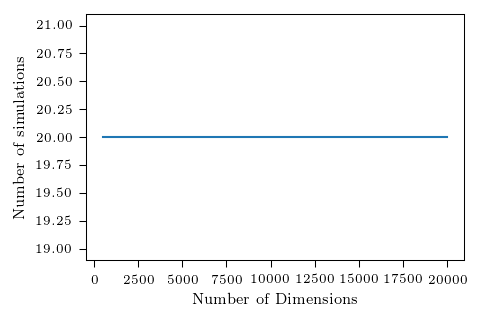

In [6]:
plt.figure()
plt.plot(plot_df.index, plot_df['acc_mle_other']['count'])
plt.ylabel('Number of simulations')
plt.xlabel('Number of Dimensions');

In [7]:
tsvar.plotting.set_aistat_matplotib_rcparams()

plot_meta_data = [
#     ('f1score',     'F1-Score',         ), 
    ('relerr',      'Relative Error',   ),
#    ('log_relerr',      'Relative Error',   ),
    ('runtime_log', 'Runtime (in min)', ),
#    ('runtime_lin', 'Runtime (in min)', ),
        
#    ('precAt5',     'Precision@5',      ),
    ('precAt10',    'Precision@10',     ),
#    ('precAt20',    'Precision@20',     ),
#    ('precAt50',    'Precision@50',     ),
#    ('precAt100', 'Precision@100',     ),
#    ('precAt200', 'Precision@200',     ),
    
#     ('num_iter', 'Number of iterations'), 
    
    ('pr_auc', 'PR-AUC'),
#     ('roc_auc', 'ROC-AUC'),
]

#   (prefix, label,  color,  ls,   lw)
queries_list = [    
    ('vi',    'VI',   'C2', '-',  1.85),
    ('gb',    'GB',   'C4', '-',  1.0),
    ('bbvi',  'BBVI', 'C1', '-',  1.0), 
#     ('mle',  'MLE',   'C0', '-',  1.0), 
    ('mle_other',  'MLE',   'C0', '-',  1.0), 
]

exp_name = EXP_DIR.rstrip(os.path.sep).split(os.path.sep)[-1]
output_dir = os.path.join('/Users/trouleau/Desktop/', exp_name)
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

for i, (prefix, ylabel) in enumerate(plot_meta_data):
    print(prefix)
    
    plt.figure(figsize=(3.25, 1.77))
    plt.grid()
    
    for suf, label, color, ls, lw in queries_list:
        col = '_'.join([prefix, suf])
        plt.errorbar(plot_df.index, plot_df[col]['mean'], yerr=plot_df[col]['std'], 
                     label=label, color=color, linestyle=ls, linewidth=lw,  capsize=2,
                     marker='o', markersize=2*lw)
    
    plt.xlabel(f'Number of training events', labelpad=0)
    plt.ylabel(ylabel, labelpad=3);
    plt.xscale('log')
    
    if prefix == 'f1score':
        #plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
        #plt.legend(loc='lower right', prop={'size': 7})
        #plt.ylim(bottom=0)
        pass
    
    if prefix == 'relerr':
        plt.grid(which='both', axis='y')
        plt.gca().tick_params(axis='y', which='major', pad=0.5)
        plt.ylabel(ylabel, labelpad=0);
        plt.yscale('log')
        plt.legend(loc='upper right', prop={'size': 7})
        plt.ylim(top=2.0)
        pass
        
    if prefix == 'log_relerr':
        plt.gca().yaxis.set_minor_locator(ticker.FixedLocator(
            np.log10(np.hstack([np.linspace(1, 10, 8)/i for i in [10, 1, 0.1, 0.01]]))))
        plt.gca().yaxis.set_major_locator(ticker.FixedLocator([10, 1, 0.1, 0.01])) 
        plt.grid(which='both', axis='both')
        vals = [-1, 0, 1]
        labs = ['$10^{'+f'{e:d}'+'}$' for e in vals]
        plt.yticks(vals, labs)
        plt.ylim(top=max_val*1.10)
        pass
        
    if prefix == 'runtime_log':
        plt.gca().yaxis.set_minor_locator(ticker.FixedLocator(
            np.log10(np.hstack([np.linspace(1, 10, 8)/i for i in [100, 10, 1, 0.1, 0.01]]))))
        plt.grid(which='both', axis='y')
        
        plt.yticks([-1, 0, 1, 2], [0.1, 1, 10, 100])
        #
        #vals = np.array([10, 50, 100, 150, 200, 250])
        #plt.plot(10 ** plot_df[col]['mean'], lw=0)
        #plt.yscale('log', basey=10, nonposy='clip')
        #plt.yticks(np.log10(vals), vals)
        #plt.gca().tick_params(axis="y",direction="in", pad=-0.1)
        #ymin, ymax = 10 ** np.array(new_ax.get_ylim())
        #plt.ylim(ymin, ymax)
        pass
        
    if prefix.startswith('prec'):
        plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
        plt.ylim(bottom=0)
        
    if prefix.startswith('num_iter'):
        plt.yscale('log', basey=10, nonposy='clip');

    if (prefix == 'pr_auc') or (prefix == 'roc_auc'):
        #plt.grid(which='both', axis='y')
        #plt.grid(which='major', axis='x')
        plt.yticks([0.4, 0.6, 0.8, 1.0])
        plt.ylim(top=1.04)
        
        
    plt.tight_layout()
    plt.subplots_adjust(left=0.15, right=0.99, top=0.97, bottom=0.2)
    # plt.subplots_adjust(left=0.15, right=0.99, top=0.94, bottom=0.15)
    plt.savefig(os.path.join(output_dir, f'fig-{exp_name}-{prefix}.pdf'))
    plt.close()

relerr
runtime_log
precAt10
pr_auc


---

In [8]:
output_df.max_jumps.unique()

array([  499,   753,  1134,  1709,  2576,  3881,  5848,  8810, 13274,
       20000])

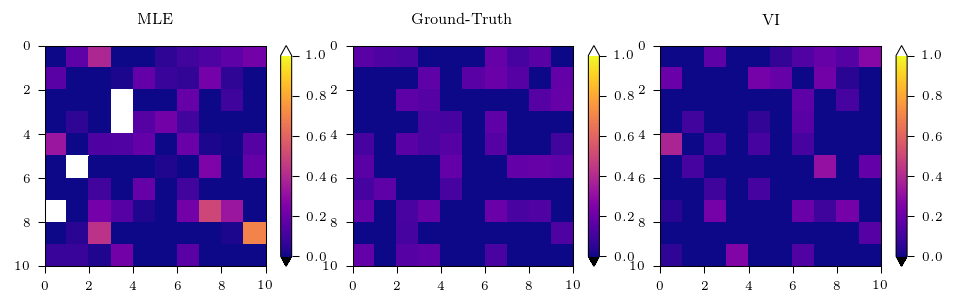

In [9]:
row = output_df.loc[output_df.max_jumps == 1134].iloc[0]

tsvar.plotting.plotmat_sidebyside(
    mats = {
       'MLE': row['mle_other_adjacency'].round(2),
       'Ground-Truth': row['adjacency'].round(2),
       'VI': row['vi_adj_mean'].round(2),
    }, 
    vmin=0.0, vmax=1.0, 
    figsize=(7.5, 1.95),
)